1. 导入库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'SimHei' 

2. 导入数据

In [2]:
df = pd.read_csv('house_sales.csv')

3. 数据概览

In [3]:
print('总记录数:', len(df))
print('字段数量:', len(df.columns))

总记录数: 106118
字段数量: 12


In [4]:
df.head(5)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,origin_url
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建,https://hf.esf.fang.com/chushou/3_404372096.htm


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106118 entries, 0 to 106117
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   city        106118 non-null  object
 1   address     104452 non-null  object
 2   area        105324 non-null  object
 3   floor       104024 non-null  object
 4   name        105564 non-null  object
 5   price       105564 non-null  object
 6   province    106118 non-null  object
 7   rooms       104036 non-null  object
 8   toward      105240 non-null  object
 9   unit        105564 non-null  object
 10  year        57736 non-null   object
 11  origin_url  105564 non-null  object
dtypes: object(12)
memory usage: 9.7+ MB


4. 数据清洗

In [6]:
# 删除无用的数据列
df.drop(columns='origin_url',inplace=True)

In [7]:
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建


In [8]:
# 检查是否有缺失值
df.isna().sum()

city            0
address      1666
area          794
floor        2094
name          554
price         554
province        0
rooms        2082
toward        878
unit          554
year        48382
dtype: int64

In [9]:
# 删除缺失值
df.dropna(inplace=True)

In [10]:
print(len(df))

57520


In [11]:
# 检查是否有重复值
df.duplicated().sum()

29416

In [12]:
# 删除重复数据
df.drop_duplicates(inplace=True)

In [13]:
print(len(df))

28104


In [14]:
# 数据类型转换(先验证操作再存回数据，以免造成污染)

In [15]:
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建
6,合肥,龙岗-长江东路与和县里交口,50㎡,高层（共30层）,柏庄金座,46万,安徽,2室1厅,南向,9200元/㎡,2019年建
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120㎡,中层（共27层）,天目未来,158万,安徽,4室2厅,南向,13167元/㎡,2012年建


In [16]:
# 面积数据处理转换
df['area'] = df['area'].str.replace('㎡', '').astype(float)

In [17]:
# 价格数据处理转换
df['price'] = df['price'].str.replace('万','').astype(float)

In [18]:
# 朝向数据类型转换
df['toward'].value_counts()

toward
南北向    15946
南向      9405
东南向     1114
东向       448
西南向      308
北向       276
西向       182
东西向      162
西北向      138
东北向      125
Name: count, dtype: int64

In [19]:
df['toward'] = df['toward'].astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28104 entries, 0 to 106088
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   city      28104 non-null  object  
 1   address   28104 non-null  object  
 2   area      28104 non-null  float64 
 3   floor     28104 non-null  object  
 4   name      28104 non-null  object  
 5   price     28104 non-null  float64 
 6   province  28104 non-null  object  
 7   rooms     28104 non-null  object  
 8   toward    28104 non-null  category
 9   unit      28104 non-null  object  
 10  year      28104 non-null  object  
dtypes: category(1), float64(2), object(8)
memory usage: 2.4+ MB


In [21]:
# 单价数据处理转换
df['unit'] = df['unit'].str.replace('元/㎡','').astype(float)

In [22]:
# 建造年份数据处理转换
df['year'] = df['year'].str.replace('年建','').astype(int)

In [23]:
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017
6,合肥,龙岗-长江东路与和县里交口,50.0,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.0,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012


In [24]:
# 异常值处理
# 房屋面积的异常

In [25]:
df[df['area']<20]

,city,address,area,floor,name,price,province,rooms,toward,unit,year
102,合肥,新省府-包河大道与南京路交口,11.00,中层（共27层）,招商·雍华府,22.0,安徽,2室1厅,南向,20000.0,2018
980,天津,体育馆街-成都道与桂林路交口,11.86,高层（共1层）,成都道小区,140.0,直辖市,1室0厅,东向,118044.0,1998
6366,杭州,北干-天汇园星云地带新区金城路金鸡路交叉处,17.00,中层（共28层）,天汇园星云地带,50.0,浙江,2室2厅,南向,29412.0,2016
8388,丽水,北郭桥/白云-莲都-北郭桥/白云-汽运宿舍,17.00,高层（共1层）,汽运宿舍,48.0,浙江,1室1厅,南北向,28235.0,1990
28798,毕节,黔西县-黔西南部新区教育园区,11.00,低层（共31层）,黔西阳光城,42.0,贵州,3室2厅,南北向,38182.0,2019
40546,巢湖,新省府-包河大道与南京路交口,11.00,中层（共27层）,招商·雍华府,22.0,安徽,2室1厅,南向,20000.0,2018
40886,蚌埠,张公山-红旗一路,15.00,低层（共7层）,朝阳新村三村,24.5,安徽,1室0厅,南向,16333.0,2000
40892,蚌埠,淮河路-胜利东路1556号,10.00,中层（共11层）,百合公馆,132.0,安徽,3室2厅,南北向,132000.0,2010
50780,泸州,蓝田-江阳区-蓝田-江阳区-蓝田,18.00,中层（共2层）,江阳区-蓝田,35.0,四川,1室1厅,南向,19444.0,2015
68686,开阳,小十字-飞山街42号,14.00,低层（共23层）,飞山街小区,13.0,贵州,1室1厅,东南向,9286.0,1998


In [26]:
df[df['area']>600]

,city,address,area,floor,name,price,province,rooms,toward,unit,year
4710,贵阳,高新区-金苏大道绿地新都会(金融中心前行5公里),752.0,低层（共23层）,绿地新都会,500.0,贵州,1室1厅,南向,6649.0,2018
5854,衡水,衡百国际-胜利路与宝云街交叉口德隆超市对面,990.0,中层（共24层）,橄榄城,77.0,河北,2室2厅,南向,778.0,2010
6834,邯郸,丛台-油漆厂路16号,2019.0,中层（共30层）,恒大翡翠御庭,113.0,河北,3室2厅,南北向,560.0,2019
44240,桂林,八里街-八里六路城北菜市,1675.0,低层（共7层）,城北小区,360.0,广西,9室9厅,南向,2149.0,2018
68248,耒阳,立新开发区-红湘北路,1401.0,中层（共28层）,香格里拉,71.0,湖南,3室2厅,南北向,507.0,2013
74440,梅州,梅江-广东梅州江南梅水路附近,700.0,低层（共7层）,梅水路附近,468.0,广东,9室9厅,东南向,6686.0,2005
103504,舟山,舟山中学-翡翠道路与桃湾路交叉口,2020.0,中层（共6层）,光明·东方大境府,240.0,浙江,4室2厅,南北向,1188.0,2019


In [27]:
len(df[(df['area']<600) & (df['area']>20)])

28079

In [28]:
df = df[(df['area']<600) & (df['area']>20)]
len(df)

28079

In [29]:
# 房屋售价异常值处理 四分位数计算IQR

In [30]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
low_price = Q1 - 1.5*IQR
high_price = Q3 + 1.5*IQR
df[df['price']<low_price]
df[df['price']>high_price]
df = df[ (df['price']<high_price) & (df['price']>low_price)]
len(df)

26135

5. 新数据特征构造

In [31]:
df.head()

,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90.0,中层（共18层）,圣地亚哥,128.0,安徽,3室2厅,南北向,14222.0,2013
2,合肥,生态公园-淮海大道与大众路交口,95.0,中层（共18层）,正荣·悦都荟,132.0,安徽,3室2厅,南向,13895.0,2019
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37.0,中层（共22层）,文一名门金隅,32.0,安徽,2室1厅,南北向,8649.0,2017
6,合肥,龙岗-长江东路与和县里交口,50.0,高层（共30层）,柏庄金座,46.0,安徽,2室1厅,南向,9200.0,2019
8,合肥,新亚汽车站-张洼路与临泉路交汇处向北100米(原红星机械,120.0,中层（共27层）,天目未来,158.0,安徽,4室2厅,南向,13167.0,2012


In [32]:
# 地区 district
df['district'] = df['address'].str.split('-').str[0]

In [33]:
df.sample(10)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district
97948,文昌,老城-经济开发区生态软件园内,75.00,中层（共18层）,融创美伦熙语,79.0,海南,2室2厅,南北向,10533.0,2019,老城
83494,榆中,五泉广场-金昌南路39号(五泉下广场向北),109.00,高层（共33层）,东南大厦,188.0,甘肃,2室2厅,东南向,17248.0,2005,五泉广场
8886,兰州,雁滩南-雁滩雁南路 中粮可口可乐公司对面,94.78,低层（共30层）,康乐花园,110.0,甘肃,2室1厅,东南向,11606.0,2007,雁滩南
12126,潍坊,火车站-云都国际和平路与建设街交汇处(联运售票处北邻,66.00,中层（共18层）,云都国际,28.0,山东,1室1厅,南向,4242.0,2011,火车站
65330,赣州,金丰路-章贡-金丰路-虹彩家园,120.00,中层（共8层）,虹彩家园,83.0,江西,3室2厅,南北向,6917.0,2005,金丰路
57800,阳曲,滨河西路-太原市万柏林区望景路9号,122.00,中层（共28层）,滨河花苑,150.0,山西,3室2厅,南北向,12295.0,2002,滨河西路
50590,农安,红旗街-红旗街富锦路交汇,100.00,中层（共7层）,富锦小区,84.8,吉林,2室1厅,南北向,8480.0,2000,红旗街
25026,平阴,甸柳新村-燕子山路的路东、文化东路的路北,38.33,中层（共5层）,甸柳小区,145.0,山东,1室1厅,南向,37829.0,1998,甸柳新村
76428,随州,曾都城区-编钟大道,140.00,中层（共17层）,交投金科府,75.0,湖北,4室2厅,南北向,5357.0,2017,曾都城区
22250,靖安,袁州区-江西省宜春市袁州区宜阳北路618号,113.00,中层（共12层）,紫竹庭院,72.0,江西,3室2厅,南北向,6372.0,2012,袁州区


In [34]:
# 楼层类型 floor_type
# 方法1
df['floor_type'] = df['floor'].str.split('（').str[0].astype('category')

In [35]:
# 方法2
def func1(str1):
    if pd.isna(str1):
        return 'Unknown'
    elif '低' in str1:
        return '低楼层'
    elif '中' in str1:
        return '中楼层'
    elif '高' in str1:
        return '高楼层'
    else:
        return 'Unknown'
df['floor_type2'] = df['floor'].apply(func1).astype('category')

In [36]:
df.sample(10)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2
94584,清远,新城-清远大道与银泉路交汇处,110.0,中层（共35层）,万科华府,100.0,广东,3室2厅,南向,9091.0,2015,新城,中层,中楼层
72730,眉山,眉州大道-眉州大道西三段,97.0,中层（共28层）,春天公馆,55.8,四川,3室2厅,南北向,5753.0,2014,眉州大道,中层,中楼层
22288,丰县,高铁站-高铁站西侧、中央大道两侧(高铁徐州站站前),120.0,低层（共24层）,绿地之窗,150.0,江苏,3室2厅,南向,12500.0,2016,高铁站,低层,低楼层
9162,南宁,大学路-振业尚府大学东路与鲁班路交叉口,94.2,高层（共33层）,振业尚府,132.0,广西,3室2厅,北向,14013.0,2016,大学路,高层,高楼层
17722,法库,建筑大学-恒达路2号(南堤东路与长青南街交汇处西南侧,125.2,低层（共25层）,华润奉天九里,207.0,辽宁,3室2厅,南北向,16534.0,2014,建筑大学,低层,低楼层
100174,银川,宝湖-彩云街与凤翔街交会处,98.0,低层（共28层）,万科理想城,72.0,宁夏,3室2厅,南向,7347.0,2021,宝湖,低层,低楼层
28,重庆,凤天路-凤西路一站,100.0,低层（共32层）,华宇城,160.0,直辖市,3室2厅,南北向,16000.0,2016,凤天路,低层,低楼层
80914,仙桃,沙嘴-仙桃市黄金大道与钱沟路交汇处(天诚大酒店对面,121.0,高层（共33层）,仙桃福星城,86.0,湖北,3室2厅,南北向,7107.0,2012,沙嘴,高层,高楼层
12100,宿迁,苏宿工业园-新宿迁中学东门,140.5,中层（共9层）,乐府兰庭,155.0,江苏,3室2厅,南北向,11032.0,2015,苏宿工业园,中层,中楼层
75316,钦州,钦南区-松宇时代城,93.0,高层（共13层）,松宇时代城,50.0,广西,4室2厅,南向,5376.0,2018,钦南区,高层,高楼层


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26135 entries, 0 to 106088
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   city         26135 non-null  object  
 1   address      26135 non-null  object  
 2   area         26135 non-null  float64 
 3   floor        26135 non-null  object  
 4   name         26135 non-null  object  
 5   price        26135 non-null  float64 
 6   province     26135 non-null  object  
 7   rooms        26135 non-null  object  
 8   toward       26135 non-null  category
 9   unit         26135 non-null  float64 
 10  year         26135 non-null  int32   
 11  district     26135 non-null  object  
 12  floor_type   26135 non-null  category
 13  floor_type2  26135 non-null  category
dtypes: category(3), float64(3), int32(1), object(7)
memory usage: 2.4+ MB


In [38]:
# 是否是直辖市zxs
df['zxs'] = df['city'].apply(lambda x: 1 if x in ['北京', '上海', '天津', '重庆'] else 0)

In [39]:
df[df['zxs']==1].sample(10)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2,zxs
28,重庆,凤天路-凤西路一站,100.00,低层（共32层）,华宇城,160.0,直辖市,3室2厅,南北向,16000.0,2016,凤天路,低层,低楼层,1
812,北京,固安-北京大兴野生动物园以南3公里路西,80.00,中层（共25层）,永定河孔雀城英国宫,98.3,直辖市,2室2厅,南北向,12288.0,2017,固安,中层,中楼层,1
538,北京,固安-北京大兴野生动物园以南3公里路西,107.00,中层（共18层）,永定河孔雀城英国宫,100.0,直辖市,3室1厅,南北向,9346.0,2016,固安,中层,中楼层,1
816,北京,燕山-岗南路和迎风街交汇处西南侧(燕山前进第二小学,82.62,高层（共5层）,杏花西里,175.0,直辖市,2室1厅,南北向,21181.0,2000,燕山,高层,高楼层,1
472,北京,"香河-京哈高速香河出口南行,五一路与新华大街交口",45.00,中层（共25层）,大运河智慧街区,38.0,直辖市,1室1厅,南北向,8444.0,2018,香河,中层,中楼层,1
324,上海,张江-孙桥公寓孙桥路235弄,51.39,中层（共6层）,孙桥公寓,210.0,直辖市,1室1厅,南向,40864.0,1997,张江,中层,中楼层,1
524,重庆,大学城-大学城东路往南一路方向320米往南200米处,79.00,低层（共28层）,协信城立方二期,81.0,直辖市,3室2厅,北向,10253.0,2012,大学城,低层,低楼层,1
1020,天津,双环邨-红桥区连环道与双环西路交口,65.00,中层（共33层）,碧春园,102.0,直辖市,2室1厅,南向,15692.0,2010,双环邨,中层,中楼层,1
972,天津,第二大街-滨海贝肯山开发区泰达MSD二大街与北海路交口,116.00,低层（共7层）,滨海贝肯山,245.0,直辖市,2室2厅,南北向,21121.0,2019,第二大街,低层,低楼层,1
112,重庆,龙兴-两江新区龙兴两江大道,111.00,中层（共6层）,协信哈罗国际,110.0,直辖市,4室3厅,南北向,9910.0,2019,龙兴,中层,中楼层,1


In [40]:
# 卧室数量 bedrooms
df['bedrooms'] = df['rooms'].str.split('室').str[0].astype(int)

In [41]:
# 客厅数量 livingrooms
# 方法1 字符串处理
# df['livingrooms'] =  df['rooms'].str.split('室').str[1].str.split('厅').str[0].astype(int)

In [42]:
# 方法2 正则表达式
df['livingrooms'] = df['rooms'].str.extract(r'(\d+)厅').astype(int)

In [43]:
df.sample(10)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2,zxs,bedrooms,livingrooms
80110,兴化,泰州体育馆-泰州市海陵区迎春东路,131.00,高层（共11层）,海曙颐园,180.0,江苏,5室2厅,南向,13740.0,2014,泰州体育馆,高层,高楼层,0,5,2
104606,长春,西安广场-长春市西安大路174号,90.84,中层（共7层）,中新花园,85.0,吉林,2室2厅,南北向,9357.0,2009,西安广场,中层,中楼层,0,2,2
83214,乐清,状元-龙湾区雁荡东路,99.00,低层（共5层）,天鹅湖住宅区,133.0,浙江,2室2厅,南北向,13434.0,2005,状元,低层,低楼层,0,2,2
71814,滦南,远洋城-祥荣里唐山市卫国路与长宁道交叉口西南方向,116.82,中层（共6层）,祥荣里,176.0,河北,3室2厅,南北向,15066.0,1999,远洋城,中层,中楼层,0,3,2
105366,长春,景阳广场-普阳街与春郊路交汇,130.00,中层（共7层）,输油花园,140.0,吉林,3室2厅,南北向,10769.0,2008,景阳广场,中层,中楼层,0,3,2
32424,临朐,锦绣学校-玉清街38号(玉清东街与虞河路交叉口往东20,79.00,低层（共6层）,锦绣苑,63.0,山东,2室1厅,南北向,7975.0,2007,锦绣学校,低层,低楼层,0,2,1
64512,海宁,长安镇-聆涛路188号,100.00,中层（共22层）,侨福一品高尔夫公馆,180.0,浙江,3室2厅,南北向,18000.0,2017,长安镇,中层,中楼层,0,3,2
90256,横县,五象片区-五象新区平乐大道与五象大道交汇处向西2000,91.00,高层（共32层）,恒大绿洲,103.0,广西,3室2厅,南北向,11319.0,2016,五象片区,高层,高楼层,0,3,2
105552,崇州,龙潭寺-龙潭新城成华大道与成金青快速通道交汇处,38.00,高层（共27层）,上古天地公寓,40.3,四川,1室2厅,南北向,10605.0,2018,龙潭寺,高层,高楼层,0,1,2
67336,进贤,九龙湖板块-江西省南昌市红角洲学府大道西客站旁,143.00,高层（共18层）,绿地悦城,255.0,江西,3室2厅,南北向,17832.0,2015,九龙湖板块,高层,高楼层,0,3,2


In [44]:
# 楼龄 building_age
df['building_age'] = 2025 - df['year']

In [45]:
df.sample(5)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2,zxs,bedrooms,livingrooms,building_age
69784,临清,东昌府-振兴路与向阳路交叉口东南角,135.0,低层（共18层）,金柱月亮湾D区,165.0,山东,3室2厅,南北向,12222.0,2012,东昌府,低层,低楼层,0,3,2,13
48364,济宁,许庄街道-北湖新区-许庄街道-恒大悦珑湾,105.0,中层（共26层）,恒大悦珑湾,75.0,山东,3室2厅,南北向,7143.0,2019,许庄街道,中层,中楼层,0,3,2,6
39054,秦皇岛,北戴河其他-滨海新大道与抚南连接线交叉口,58.0,中层（共7层）,好莱坞魔法城,68.0,河北,1室1厅,南北向,11724.0,2018,北戴河其他,中层,中楼层,0,1,1,7
78062,台山,台城街道-环市东路东方豪苑(五福桥侧),130.0,中层（共17层）,东方豪苑,75.0,广东,3室2厅,南北向,5769.0,2012,台城街道,中层,中楼层,0,3,2,13
18404,慈溪,慈溪其他-慈溪-慈溪其他-盛世龙湖,44.0,中层（共7层）,盛世龙湖,28.6,浙江,1室1厅,南向,6500.0,2015,慈溪其他,中层,中楼层,0,1,1,10


In [46]:
# 价格分段 price_labels
df['price_labels'] = pd.cut(df['price'], bins=4, labels=['低价', '中价', '高价', '超高价'])

In [47]:
df.sample(5)

,city,address,area,floor,name,price,province,rooms,toward,unit,year,district,floor_type,floor_type2,zxs,bedrooms,livingrooms,building_age,price_labels
14762,烟台,福海路-英特尔大道36号,85.0,中层（共18层）,君山水,68.0,山东,3室2厅,南北向,8000.0,2019,福海路,中层,中楼层,0,3,2,6,低价
8514,洛阳,行署路-九都西路与上阳路交叉口,125.0,高层（共33层）,名门万象,140.0,河南,4室2厅,南北向,11200.0,2017,行署路,高层,高楼层,0,4,2,8,中价
47798,建德,富阳-祥生云湖城银湖街道银湖实验学校东侧,89.1,中层（共17层）,祥生云湖城,156.0,浙江,3室2厅,南北向,17508.0,2017,富阳,中层,中楼层,0,3,2,8,中价
34708,如皋,城北街道-如皋市-如皋-沪润金域蓝湾,116.0,中层（共23层）,沪润金域蓝湾,90.0,江苏,3室2厅,南北向,7759.0,2014,城北街道,中层,中楼层,0,3,2,11,中价
88538,登封,CBD-天赋路与九如东路交叉口向东150米路北,99.7,中层（共6层）,老街绿地郑东新苑1期,255.0,河南,2室2厅,南北向,25577.0,2010,CBD,中层,中楼层,0,2,2,15,超高价


6. 问题分析及可视化

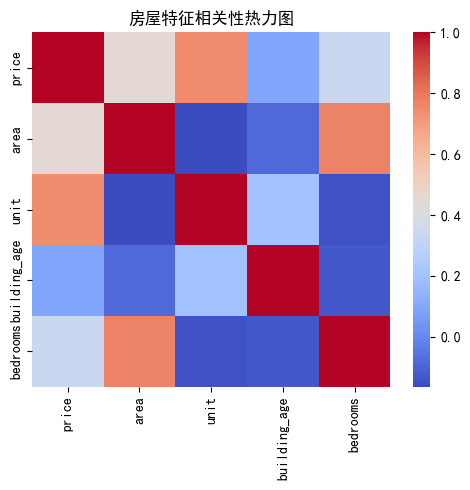

In [51]:
'''
问题编号: A1
问题: 哪些变量最影响房价? 面积、楼层、房间数哪个影响更大?
分析主题: 特征相关性
分析目标: 了解房屋各特征对房价的线性影响
分组字段: 无
指标/方法: 皮尔逊相关系数
'''

# 选择数值型特征
a = df[['price', 'area', 'unit', 'building_age', 'bedrooms']].corr() # 相关系数
# 对房价影响最大的几个因素的排序
a['price'].sort_values(ascending=False)[1:]
# 相关性热力图
plt.figure(figsize = (5, 5))
sns.heatmap(a,cmap='coolwarm')
plt.title('房屋特征相关性热力图')
plt.tight_layout()

In [52]:
'''
问题编号: A2
问题: 全国房价整体分布如何？是否存在极端值？
分析主题: 描述性统计
分析目标: 概览数值型字段的分布特征
分组字段: 无
指标/方法: 平均数/中位数/四分位数/标准差
'''

df.describe()

,area,price,unit,year,zxs,bedrooms,livingrooms,building_age
count,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000,26135.000000
mean,103.755810,117.208370,11610.131012,2013.072240,0.008800,2.714444,1.848556,11.927760
std,33.995994,60.967675,5824.245273,6.019342,0.093399,0.800768,0.407353,6.019342
min,21.000000,9.000000,1000.000000,1976.000000,0.000000,0.000000,0.000000,2.000000
25%,85.005000,72.000000,7587.000000,2011.000000,0.000000,2.000000,2.000000,8.000000
50%,100.000000,103.000000,10312.000000,2015.000000,0.000000,3.000000,2.000000,10.000000
75%,123.000000,150.000000,14184.000000,2017.000000,0.000000,3.000000,2.000000,14.000000
max,470.000000,306.000000,85288.000000,2023.000000,1.000000,9.000000,12.000000,49.000000


(array([ 991., 4810., 6499., 4613., 3362., 2226., 1333., 1055.,  691.,
         555.]),
 array([  9. ,  38.7,  68.4,  98.1, 127.8, 157.5, 187.2, 216.9, 246.6,
        276.3, 306. ]),
 <BarContainer object of 10 artists>)

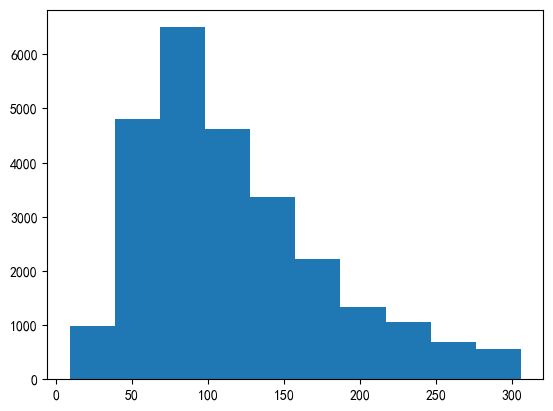

In [55]:
# 绘制房价分布直方图
plt.subplot()
plt.hist(df['price'], bins=10)

<Axes: xlabel='price', ylabel='Count'>

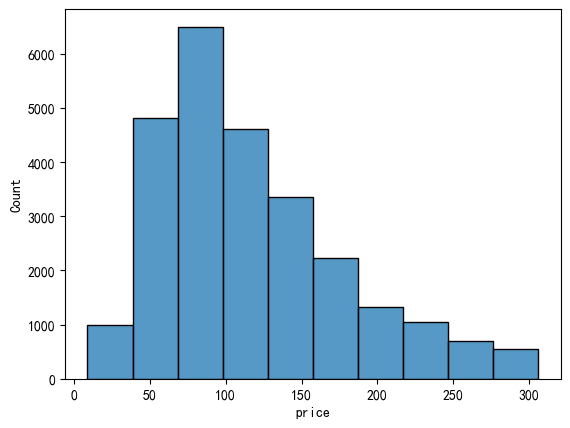

In [60]:
sns.histplot(data=df, x='price', bins=10, kde=True)

In [62]:
'''
问题编号: A6
问题: 南北朝向是否真的比单一朝向贵？贵多少？
分析主题: 朝向溢价
分析目标: 评估不同朝向价格差异
分组字段: toward
指标/方法: 方差分析/多重比较
'''

df['toward'].value_counts()
df.groupby('toward').agg({
    'price': ['mean', 'median'],
    'unit':'median',
    'building_age':'mean'
})

price            unit building_age
              mean median   median         mean
toward                                         
东北向     114.555333  100.0  12198.0    12.609524
东南向     115.542608  105.0  10864.0    10.951745
东向      110.158568   95.0  11421.0    12.761337
东西向      98.935099   82.0   9000.0    15.490066
北向       92.527907   75.5  11698.0    13.108527
南北向     119.472147  104.5  10000.0    12.073703
南向      114.555016  103.0  10759.0    11.551160
西北向     119.107594  105.0  12290.0    13.473684
西南向     139.711811  138.4  13333.0    13.452756
西向      102.662298   86.0  12528.0    13.385093

<Axes: xlabel='toward', ylabel='price'>

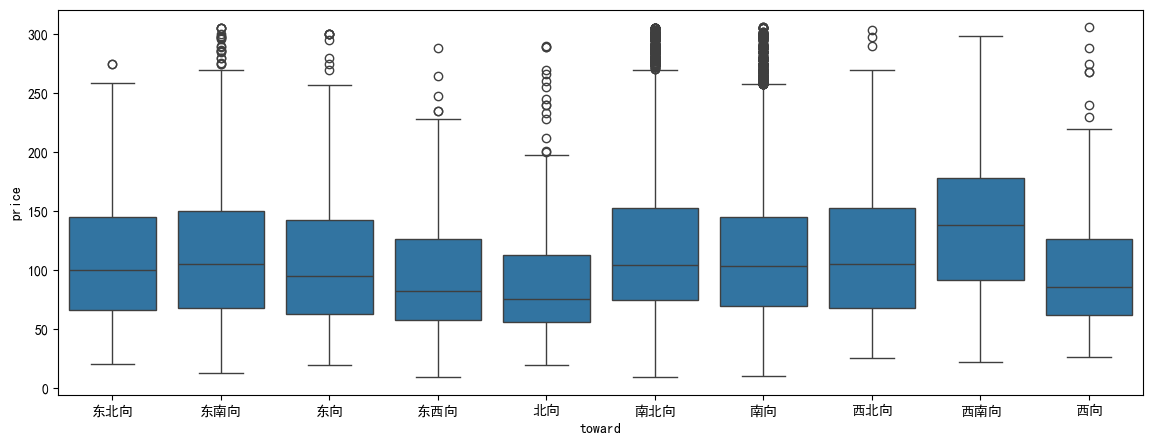

In [63]:
# 数据可视化
plt.figure(figsize=(14, 5))
sns.boxplot(x='toward', y='price', data=df)